<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
- 단축 경로1: 'https://bit.ly/CustomersFile'    
- 단축 경로2: 'https://bit.ly/ProductsFile'  
- 단축 경로3: 'https://bit.ly/OrdersFile'  

In [41]:
path = 'https://bit.ly/CustomersFile'
customers = pd.read_csv(path)
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [42]:
path = 'https://bit.ly/ProductsFile'
products = pd.read_csv(path)
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [43]:
path = 'https://bit.ly/OrdersFile'
orders = pd.read_csv(path)
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers) 4가지 이상 탐색**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

**1-1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [30]:
# 상위 5개 행 확인
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [31]:
# 하위 5개 행 확인
customers.tail()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
2238,c400937,2017-03-12,인천광역시 계양구 주부토로,F,1980,인천광역시,계양구
2239,c401555,2017-03-20,경기도 남양주시 별내면 청학로68번길,F,1981,경기도,남양주시
2240,c401584,2017-03-20,경기도 성남시 분당구 불정로,F,1979,경기도,성남시
2241,c402010,2017-03-25,경기도 성남시 분당구 판교원로82번길,F,1969,경기도,성남시
2242,c402634,2017-03-30,경기도 용인시 수지구 죽전로,F,1960,경기도,용인시


**1-2) 열 데이터 형식, 값 개수**

- 어떤 열이 있고, 몇 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [32]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


**1-3) 기초통계정보 확인**

- 기초통계정보를 통해 데이터 분포 상황을 살펴봅니다.

In [33]:
customers.describe()

,BirthYear
count,2243.000000
mean,1971.107445
std,9.658465
min,1932.000000
25%,1966.000000
50%,1972.000000
75%,1978.000000
max,1999.000000


**1-4) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [34]:
customers.isnull().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

**1-5) 범주형 데이터 확인**

- 범주형 값을 갖는 열의 범주 값과 그 값의 개수를 확인합니다.

- 성별

In [35]:
customers['Gender'].value_counts()

F    2060
M     183
Name: Gender, dtype: int64

**1-6) 정렬해서 확인**

- BirthYear 를 기준으로 내림차순 정렬해 확인합니다.

In [36]:
# 내림차순 정렬 ← ascending=False
customers.sort_values(by='BirthYear', ascending=False)

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
888,c179592,2011-01-05,인천광역시 남동구 문화로89번길,F,1999,인천광역시,남동구
1655,c326331,2014-09-01,인천광역시 남구 문화로,F,1995,인천광역시,남구
2137,c385259,2016-08-01,서울특별시 동대문구 사가정로,F,1994,서울특별시,동대문구
1636,c323726,2014-07-31,경기도 파주시 청암로,F,1993,경기도,파주시
1945,c356987,2015-08-21,경기도 수원시 장안구 하률로46번길,F,1993,경기도,수원시
...,...,...,...,...,...,...,...
298,c081187,2006-12-11,경기도 안성시 대덕면 내리5길,F,1936,경기도,안성시
869,c175224,2010-11-16,경기도 안양시 동안구 흥안대로414번길,F,1933,경기도,안양시
366,c091147,2007-08-07,서울특별시 마포구 신수로9길,F,1933,서울특별시,마포구
1537,c311943,2014-03-28,서울특별시 노원구 화랑로51길,M,1932,서울특별시,노원구


-------------------------------------------------------------------------------------------

**2) 상품 정보(products) 4가지 이상 탐색**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

**2-1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [44]:
# 상위 5개 행 확인
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [45]:
# 하위 5개 행 확인
products.tail()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
57,p1246581,초코우유,유제품,우유,4
58,p1255281,딸기요거트,유제품,요거트,4
59,p1256521,부침용두부,반찬류,두부,1
60,p1284851,유기농우유,유제품,우유,4
61,p1299491,당근,채소,뿌리채소,5


**2-2) 열 데이터 형식, 값 개수**

- 어떤 열이 있고, 몇 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [46]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
 3   SubCategory  62 non-null     object
 4   CategoryOrd  62 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


**2-3) 기초통계정보 확인**

- 기초통계정보를 통해 데이터 분포 상황을 살펴봅니다.

In [47]:
products.describe()

,CategoryOrd
count,62.000000
mean,3.612903
std,1.406715
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


**2-4) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [49]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

**2-5) 범주형 데이터 확인**

- 범주형 값을 갖는 열의 범주 값과 그 값의 개수를 확인합니다.

- ProductName

In [53]:
products['ProductName'].value_counts()

당근         3
감자칩        2
부침용두부      1
팽이버섯       1
두부_대       1
뿌셔뿌셔       1
딸기_소       1
딸기아이스크림    1
통단팥빵       1
무농약시금치     1
콘칩         1
양배출        1
연두부        1
시금치        1
깻잎         1
두부_소       1
팥아이스크림     1
청오이        1
양파         1
초코콘        1
브로컬리       1
애호박        1
낱개캔디       1
딸기요거트      1
열무         1
소보루빵       1
짱구         1
무          1
사과아이스크림    1
피망         1
부추         1
파          1
플레인요거트     1
숙주나물       1
순두부        1
포토아이스크림    1
콩나물        1
참외         1
느타리버섯      1
사과_대       1
사과_소       1
초코우유       1
유기농우유      1
우유200      1
저지방우유      1
배아이스크림     1
감귤컵푸딩      1
우유1000     1
백오이        1
초코아이스크림    1
딸기_대       1
유부         1
토마토        1
상추         1
새우깡        1
마늘         1
고구마스틱      1
쌈모음        1
포도컵푸딩      1
Name: ProductName, dtype: int64

- Category

In [54]:
products['Category'].value_counts()

채소     23
유제품    14
간식     11
반찬류     8
과일      6
Name: Category, dtype: int64

- SubCategory

In [55]:
products['SubCategory'].value_counts()

뿌리채소     9
잎채소      8
아이스크림    7
과자       6
두부       6
우유       5
열매채소     4
과채       4
사탕류      3
요거트      2
나물류      2
버섯       2
빵        2
과수       2
Name: SubCategory, dtype: int64

-------------------------------------------------------------------------------------------

**3) 주문 정보(orders) 4가지 이상 탐색**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

**3-1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [56]:
# 상위 5개 행 확인
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


In [57]:
# 하위 5개 행 확인
orders.tail()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
68834,76,1,2017-03-31,p1201601,1,2100,c302834
68835,77,1,2017-03-31,p1002841,1,10700,c343734
68836,78,1,2017-03-31,p1012761,1,1900,c354639
68837,79,1,2017-03-31,p1005891,1,1950,c394131
68838,79,2,2017-03-31,p1179241,1,2200,c394131


**3-2) 열 데이터 형식, 값 개수**

- 어떤 열이 있고, 몇 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


**3-3) 기초통계정보 확인**

- 기초통계정보를 통해 데이터 분포 상황을 살펴봅니다.

In [60]:
orders.describe()

,OrderID,Seq,Qty,Amt
count,68839.000000,68839.000000,68839.000000,68839.000000
mean,38.551519,2.082628,1.266985,2847.057990
std,23.952370,1.469644,1.372289,2634.378327
min,1.000000,1.000000,1.000000,250.000000
25%,18.000000,1.000000,1.000000,1300.000000
50%,37.000000,2.000000,1.000000,1950.000000
75%,56.000000,3.000000,1.000000,3227.000000
max,122.000000,15.000000,200.000000,109100.000000


**3-4) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [61]:
orders.isnull().sum()

OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**# 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [62]:
# 데이터 크기 확인

print(customers.shape)
print(products.shape)
print(orders.shape)

(2243, 7)
(62, 5)
(68839, 7)


**1) 데이터 통합 --> sales 데이터프레임**

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.  
    
- 통합 방안  
    - CustomerID 열을 기준으로 customers 와 orders 데이터를 inner 방식으로 조인(병합)합니다.  
    - ProductID 열 기준으로 sales 와 products 데이터를 inner 방식으로 조인(병합)합니다.  
    - 세 개의 데이터프레임을 병합(조인)하여 sales 데이터프레임을 선언합니다.  
    - 이후의 모든 작업은 sales 데이터프레임을 대상으로 진행합니다.

In [125]:
# 데이터프레임 조인
sales = pd.merge(customers, orders, on='CustomerID', how='inner')
sales = pd.merge(sales, products, on='ProductID', how='inner')

# 확인
sales.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,OrderID,Seq,OrderDate,ProductID,Qty,Amt,ProductName,Category,SubCategory,CategoryOrd
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,46,1,2016-01-14,p1013161,1,2900,느타리버섯,채소,버섯,5
1,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,37,2,2016-09-18,p1013161,2,5900,느타리버섯,채소,버섯,5
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,31,2,2016-01-23,p1013161,1,2900,느타리버섯,채소,버섯,5
3,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,19,3,2016-07-24,p1013161,1,2950,느타리버섯,채소,버섯,5
4,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,78,2,2017-01-02,p1013161,1,2950,느타리버섯,채소,버섯,5


**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [126]:
# 결측치 확인
sales.isnull().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
OrderID         0
Seq             0
OrderDate       0
ProductID       0
Qty             0
Amt             0
ProductName     0
Category        0
SubCategory     0
CategoryOrd     0
dtype: int64

**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도) 등등

In [127]:
import pandas as pd
sales['OrderYear'] = pd.to_datetime(sales['OrderDate']).dt.year
sales['OrderMonth'] = pd.to_datetime(sales['OrderDate']).dt.month
sales['Age'] = 2017 - sales['BirthYear']

In [128]:
sales.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,OrderID,Seq,OrderDate,ProductID,Qty,Amt,ProductName,Category,SubCategory,CategoryOrd,OrderYear,OrderMonth,Age
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,46,1,2016-01-14,p1013161,1,2900,느타리버섯,채소,버섯,5,2016,1,49
1,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,37,2,2016-09-18,p1013161,2,5900,느타리버섯,채소,버섯,5,2016,9,49
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,31,2,2016-01-23,p1013161,1,2900,느타리버섯,채소,버섯,5,2016,1,50
3,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,19,3,2016-07-24,p1013161,1,2950,느타리버섯,채소,버섯,5,2016,7,50
4,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,78,2,2017-01-02,p1013161,1,2950,느타리버섯,채소,버섯,5,2017,1,50


**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용  
    - Address: Addr1 과 Addr2 열 사용  
    - OrderID: CustomerID가 있는 고객기 주문한 것이니 때문에 분석 대상에서 제외
    - CategoryOrd: 분석 대상에서 제외
    - SubCategory: 분석 대상에서 제외 

In [129]:
sales.drop(['OrderDate', 'ProductID', 'Address', 'OrderID', 'SubCategory', 'CategoryOrd'], axis=1, inplace=True)

sales.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Seq,Qty,Amt,ProductName,Category,OrderYear,OrderMonth,Age
0,c017487,2002-07-31,F,1968,경기도,성남시,1,1,2900,느타리버섯,채소,2016,1,49
1,c017487,2002-07-31,F,1968,경기도,성남시,2,2,5900,느타리버섯,채소,2016,9,49
2,c017517,2002-07-31,M,1967,경기도,남양주시,2,1,2900,느타리버섯,채소,2016,1,50
3,c017517,2002-07-31,M,1967,경기도,남양주시,3,1,2950,느타리버섯,채소,2016,7,50
4,c017517,2002-07-31,M,1967,경기도,남양주시,2,1,2950,느타리버섯,채소,2017,1,50


**5) 열 이름 변경**

- Addr1, Addr2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [131]:
# 열 이름 변경
cols = {'Addr1':'시도', 'Addr2':'구군'}
sales.rename(columns=cols, inplace=True)

# 확인
sales.head()

,CustomerID,RegisterDate,Gender,BirthYear,시도,구군,Seq,Qty,Amt,ProductName,Category,OrderYear,OrderMonth,Age
0,c017487,2002-07-31,F,1968,경기도,성남시,1,1,2900,느타리버섯,채소,2016,1,49
1,c017487,2002-07-31,F,1968,경기도,성남시,2,2,5900,느타리버섯,채소,2016,9,49
2,c017517,2002-07-31,M,1967,경기도,남양주시,2,1,2900,느타리버섯,채소,2016,1,50
3,c017517,2002-07-31,M,1967,경기도,남양주시,3,1,2950,느타리버섯,채소,2016,7,50
4,c017517,2002-07-31,M,1967,경기도,남양주시,2,1,2950,느타리버섯,채소,2017,1,50


## 4.데이터 분석: 4가지 이상

- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

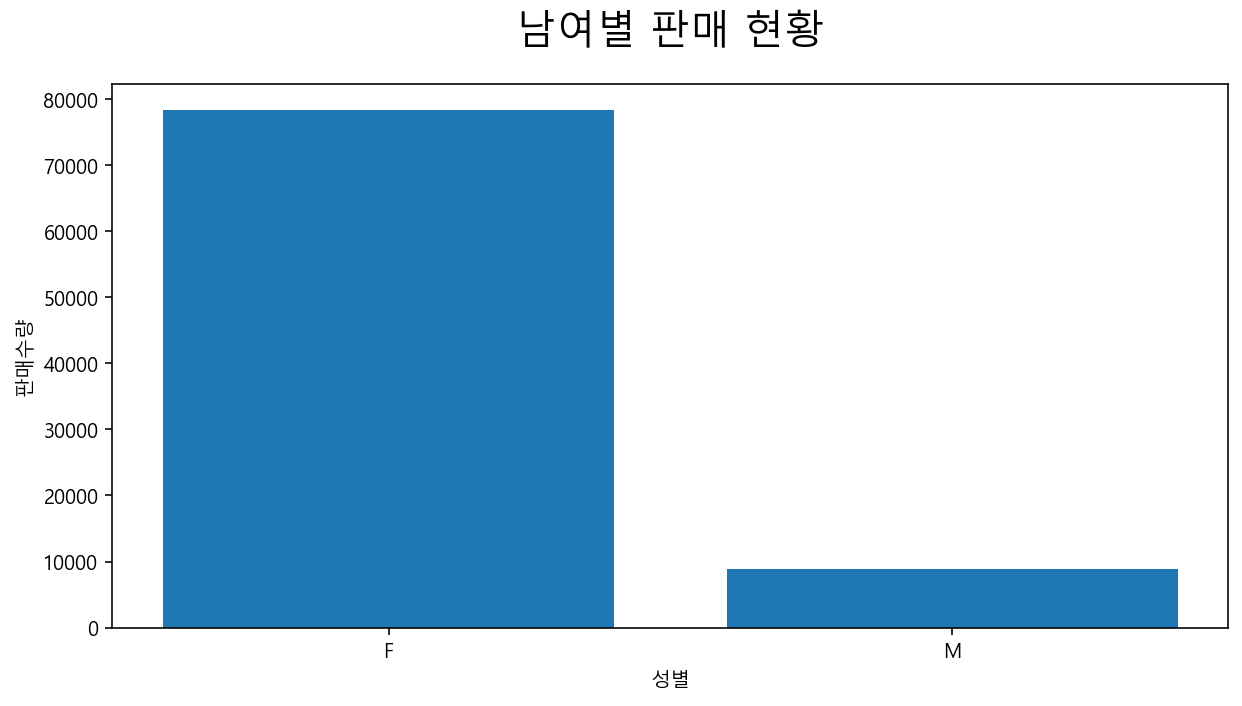

In [141]:
# 남녀별 판매 현황
tmp = sales.groupby(by='Gender', as_index=False)[['Qty']].sum()

## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['Gender'], tmp['Qty'])

# 차트 제목
plt.title('남여별 판매 현황', fontsize=20, pad=20)

# 라벨
plt.xlabel('성별')
plt.ylabel('판매수량')

plt.show()

**2) 지역별 판매 현황** - TOP 25

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.  
- 판매수량 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [145]:
# 판매수량 순 정렬
tmp =sales.sort_values(by='Qty', ascending=False)

# 인덱스 초기화
tmp.reset_index(drop=True, inplace=True)

# 증가액 기준으로 상위 25개 행 추출해 tmp 데이터프레임을 선언
tmp = tmp.head(25)

# 확인
tmp

,CustomerID,RegisterDate,Gender,BirthYear,시도,구군,Seq,Qty,Amt,ProductName,Category,OrderYear,OrderMonth,Age
0,c043687,2004-02-23,M,1964,경기도,안성시,1,200,51600,낱개캔디,간식,2016,9,53
1,c352349,2015-06-23,F,1973,인천광역시,계양구,1,100,86400,소보루빵,간식,2016,9,44
2,c352349,2015-06-23,F,1973,인천광역시,계양구,2,100,109100,통단팥빵,간식,2016,9,44
3,c345371,2015-04-07,F,1973,경기도,의왕시,3,72,19656,낱개캔디,간식,2016,12,44
4,c311943,2014-03-28,M,1932,서울특별시,노원구,1,70,18550,낱개캔디,간식,2016,6,85
5,c334413,2014-11-25,F,1984,서울특별시,종로구,2,60,16380,낱개캔디,간식,2016,4,33
6,c108176,2008-07-18,F,1946,경기도,안양시,1,60,16380,낱개캔디,간식,2016,12,71
7,c043687,2004-02-23,M,1964,경기도,안성시,1,60,15480,낱개캔디,간식,2016,12,53
8,c096617,2008-01-16,M,1972,경기도,남양주시,1,60,51840,소보루빵,간식,2016,10,45
9,c317556,2014-05-24,F,1981,경기도,부천시,1,50,13650,낱개캔디,간식,2016,4,36


- tmp 데이터프레임을 대상으로 지역별 판매수량을 막대 그래프로 시각화해 확인합니다.

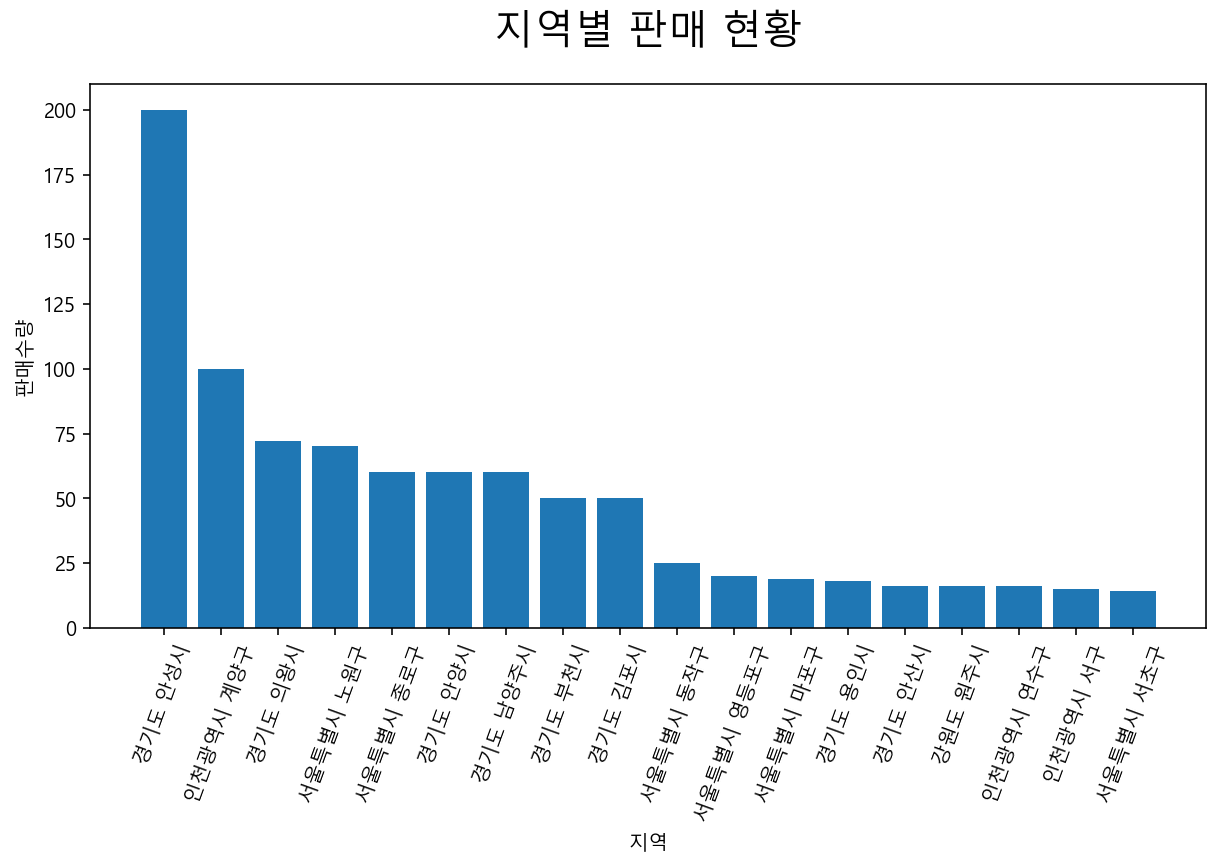

In [148]:
# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['시도'] + ' ' + tmp['구군'], tmp['Qty'])

# 차트 제목
plt.title('지역별 판매 현황', fontsize=20, pad=20)

# 라벨
plt.xlabel('지역')
plt.ylabel('판매수량')

# x축 레이블 회전 - x 축 값을 기울여 표시
plt.xticks(rotation=70) 

plt.show()

**3) 월 별 판매 현황** 

- 월 별 판매 현황을 막대 그래프로 시각화해 확인합니다. 

In [262]:
# 월 별 판매 현황
tmp = sales.drop(sales.loc[sales['OrderYear'] == 2017, 'OrderYear'])
tmp = tmp.groupby(by='OrderMonth', as_index=False)[['Amt']].sum()
print(tmp['OrderYear'])

plt.figure(figsize=(10,5))
plt.plot(tmp['OrderMonth'], tmp['Amt'])
plt.title('월 별 판매 현황', fontsize=20, pad=20)
plt.xlabel('월')
plt.ylabel('판매금액')
plt.ticklabel_format(axis='y', style='plain')

plt.show()

AttributeError: 'NoneType' object has no attribute 'groupby'

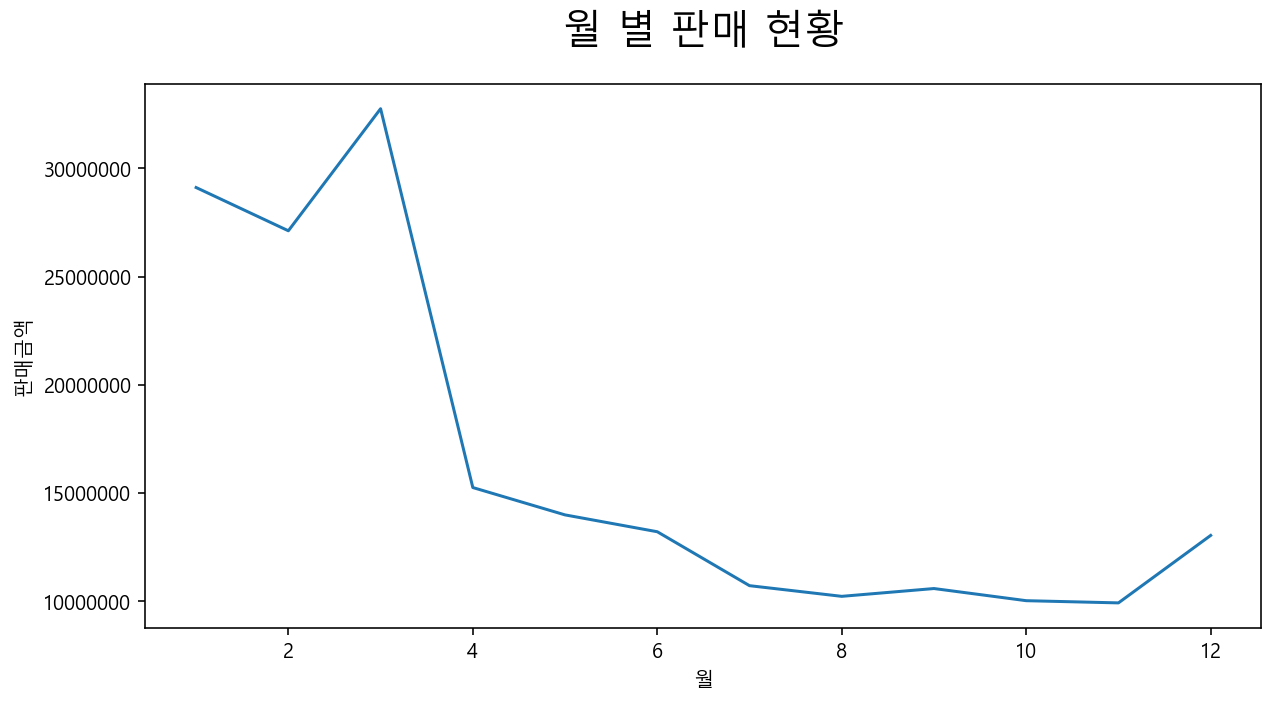

In [228]:
# 월 별 판매 현황
tmp = sales.groupby(by='OrderMonth', as_index=False)[['Amt']].sum()

## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 선 그래프
plt.plot(tmp['OrderMonth'], tmp['Amt'])

# 차트 제목
plt.title('월 별 판매 현황', fontsize=20, pad=20)

# 라벨
plt.xlabel('월')
plt.ylabel('판매금액')

# style='plain' : y축 숫자 다보여주기
plt.ticklabel_format(axis='y', style='plain')

plt.show()

**4) 제품 별 판매 현황** 
- 제품이름 기준으로 상위 10개 행을 추출해 tmp 데이터프레임을 선언합니다.

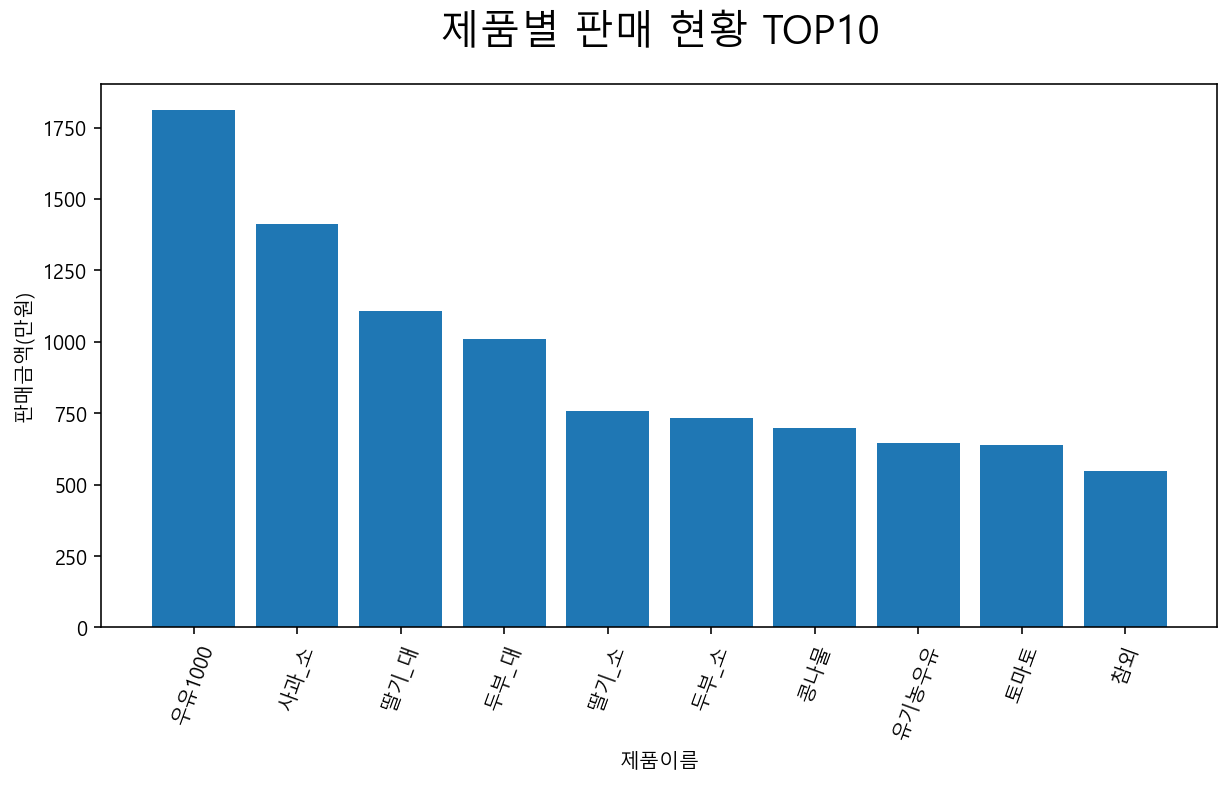

In [240]:
# 제품 별 판매 현황
tmp = sales.groupby(by='ProductName', as_index=False)[['Amt']].sum()
tmp.sort_values(by='Amt', ascending=False, inplace=True)
tmp = tmp.head(10)

## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 선 그래프
plt.bar(tmp['ProductName'], tmp['Amt']/10000)

# 차트 제목
plt.title('제품별 판매 현황 TOP10', fontsize=20, pad=20)

# 라벨
plt.xlabel('제품이름')
plt.ylabel('판매금액(만원)')

# style='plain' : y축 숫자 다보여주기
plt.ticklabel_format(axis='y', style='plain')

# x축 레이블 회전
plt.xticks(rotation=70)

plt.show()

**5) 추가**

## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [165]:
# 데이터프레임 만들기
cst = sales.groupby(by='CustomerID')[['Qty', 'Amt']].sum()

# 판매 금액 합 내림차순 정렬
cst.sort_values(by='Amt', ascending=False, inplace=True)

# 확인
cst.head()

,Qty,Amt
CustomerID,,
c206248,613,1245250
c110521,356,1111062
c236759,431,1084895
c085186,348,1080608
c043687,1008,1043129


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [166]:
# 기초 통계량 살펴보기 
cst.describe().apply(lambda x: x.apply('{0:,.0f}'.format))

,Qty,Amt
count,"2,237","2,237"
mean,39,"87,612"
std,63,"140,178"
min,1,273
25%,4,"8,450"
50%,13,"30,150"
75%,47,"102,673"
max,"1,008","1,245,250"


# **3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum  
    
- 분류 기준과 등급 이름 ← 선택!
    - q1 이하 → 'Family'  
    - q1 초과 q2 이하 → 'Bronze'  
    - q2 초과 q3 이하 → 'Silver'  
    - q3 초과 → 'Gold'

In [167]:
q1 = cst.describe().loc['25%' ,'Amt']
q2 = cst.describe().loc['50%' ,'Amt']
q3 = cst.describe().loc['75%' ,'Amt']

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [171]:
bin = [-np.inf, q1, q2, q3, +np.inf]
label = ['Family', 'Bronze', 'Silver', 'Gold']
cst['Level'] = pd.cut(cst['Amt'], bins=bin, labels=label)

# 확인
cst.head()

,Qty,Amt,Level
CustomerID,,,
c206248,613,1245250,Gold
c110521,356,1111062,Gold
c236759,431,1084895,Gold
c085186,348,1080608,Gold
c043687,1008,1043129,Gold


- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [173]:
# 결측치 유무 확인
print(cst.isnull().sum())

Qty      0
Amt      0
Level    0
dtype: int64


In [176]:
# 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증
cst['Level'].value_counts()

Family    560
Bronze    560
Gold      559
Silver    558
Name: Level, dtype: int64

## 6.등급별 고객 분석: 4가지 이상

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

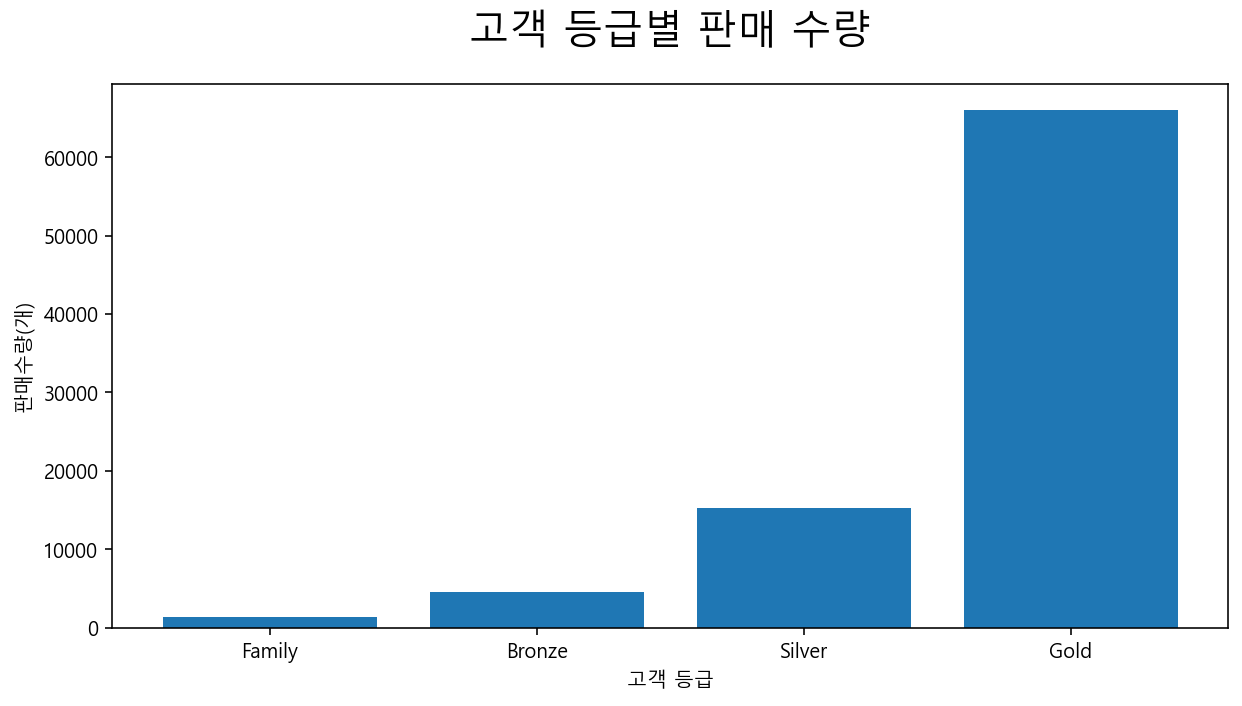

In [180]:
# 고객 등급별 판매 수량
tmp = cst.groupby(by='Level', as_index=False)['Qty'].sum()

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['Level'], tmp['Qty'])

# 차트 제목
plt.title('고객 등급별 판매 수량', fontsize=20, pad=20)

# 라벨
plt.xlabel('고객 등급')
plt.ylabel('판매수량(개)')

plt.show()

**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

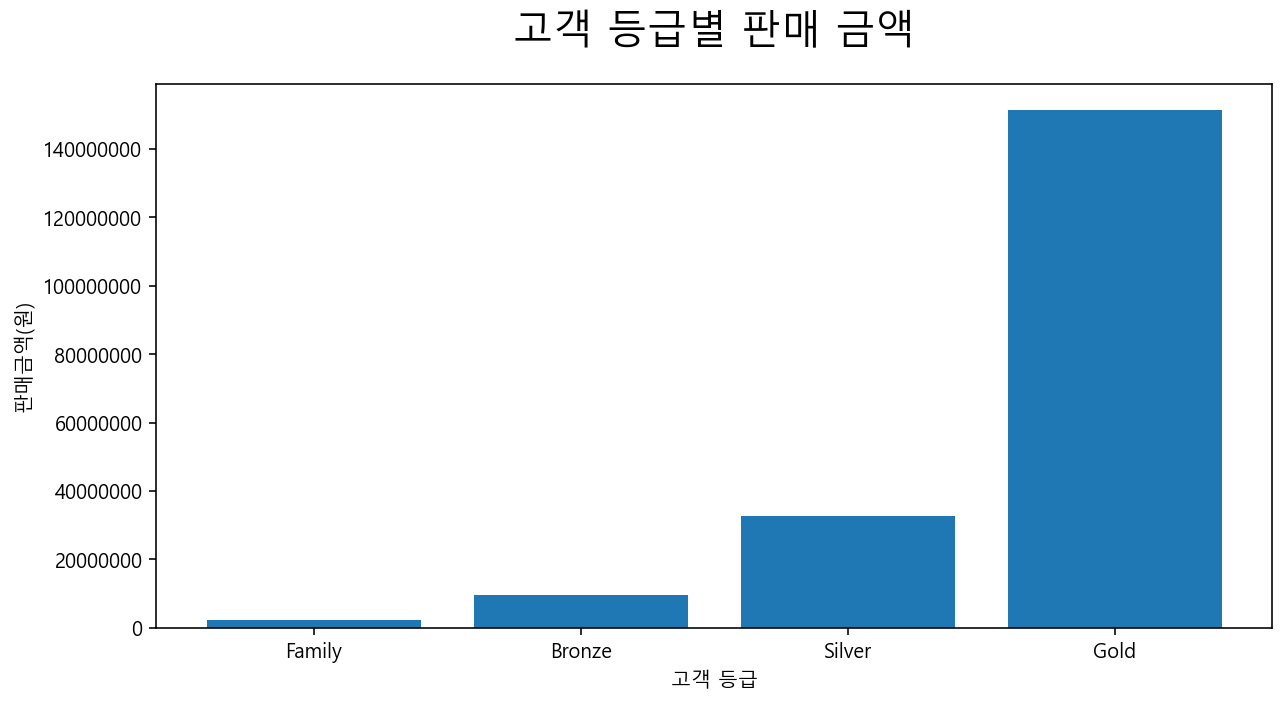

In [185]:
# 고객 등급별 판매 금액
tmp = cst.groupby(by='Level', as_index=False)['Amt'].sum()

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['Level'], tmp['Amt'])

# 차트 제목
plt.title('고객 등급별 판매 금액', fontsize=20, pad=20)

# 라벨
plt.xlabel('고객 등급')
plt.ylabel('판매금액(원)')

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain')

plt.show()

**3) 등급별 평균판매 금액**

- 고객 등급별 평균판매 금액을 막대 그래프로 시각화해 확인합니다.

In [222]:
cst['평균판매'] = cst['Qty'] / cst['Amt']
tmp = cst.sort_values(by='평균판매', ascending=False)
tmp.reset_index(drop=True, inplace=True)
tmp.head()

,Qty,Amt,Level,평균판매
0,70,18550,Bronze,0.003774
1,1,273,Family,0.003663
2,28,7644,Family,0.003663
3,1,273,Family,0.003663
4,9,3600,Family,0.002500


## 7.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- 
- 
- 
- 
- 

**2) 기타**

- 
- 
- 
- 
- 